In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings(action='ignore')

In [2]:
housing = pd.read_csv('../data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
to_drop = ['longitude', 'latitude']

housing = housing.drop(labels=to_drop, axis=1)

In [5]:
numerical_features = ['housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income',
                      'median_house_value']

categorical_features = ['ocean_proximity']

In [6]:
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

housing[numerical_features] = imputer.fit_transform(housing[numerical_features])


X = pd.concat(objs=[pd.DataFrame(scaler.fit_transform(housing[numerical_features]), columns=numerical_features),
                    housing[categorical_features]], axis=1)

X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY


In [7]:
n_cluster = np.linspace(start=2, stop=10, num=5, dtype=int)

cost = []

for n in n_cluster:
    kprototype = KPrototypes(n_jobs=-1, n_clusters=n, init='Huang', random_state=0)
    kprototype.fit_predict(X, categorical=[7])
    cost.append(kprototype.cost_)

No handles with labels found to put in legend.


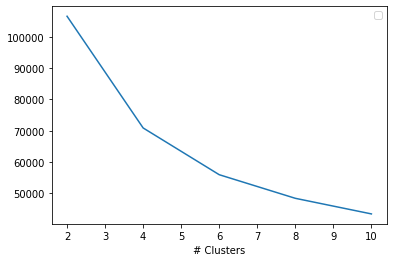

In [8]:
plt.plot(n_cluster, cost)
plt.legend(loc='best')
plt.xlabel('# Clusters')
plt.show()